In [ ]:
# Test 5_1
# This test uses a simple CNN to classify between having an circle or not

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_dir = '../../Dataset_Scripts/Datasets/Dataset_5_1/train'
test_dir = '../../Dataset_Scripts/Datasets/Dataset_5_1/test'

In [4]:
IMG_SIZE = 250
BATCH_SIZE = 32

In [5]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    )

Found 11000 files belonging to 2 classes.


2024-04-23 22:53:27.822532: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-23 22:53:27.822986: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-23 22:53:27.823326: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 5000 files belonging to 2 classes.


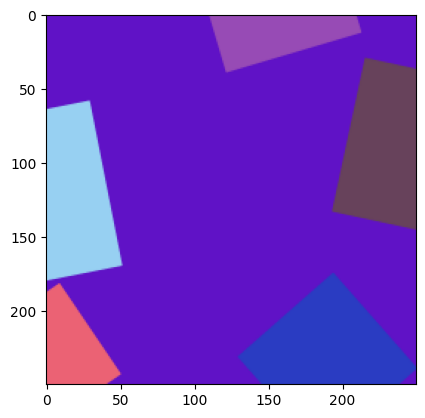

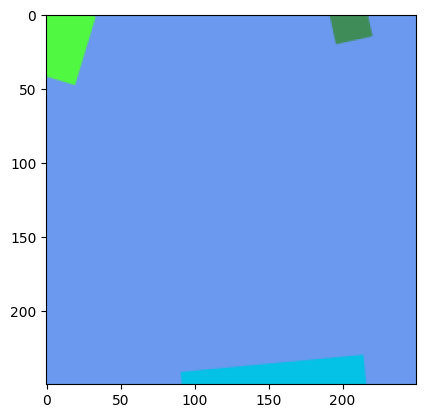

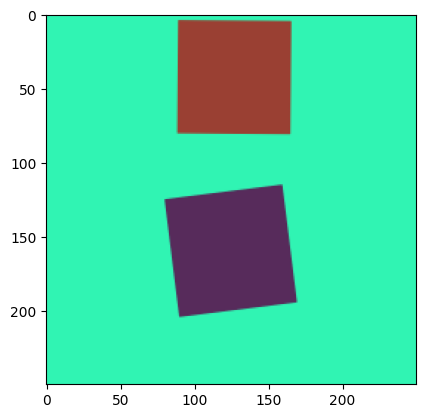

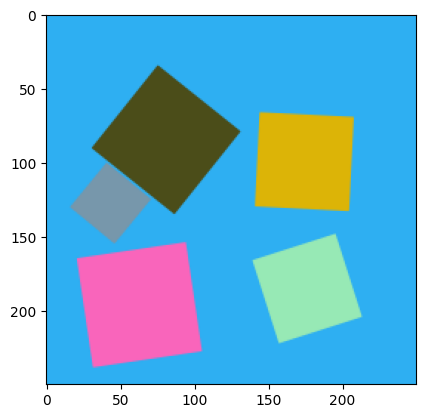

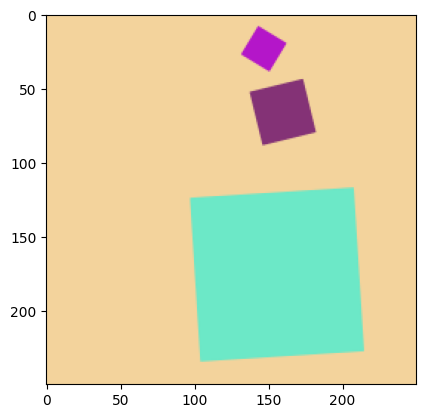

In [6]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [7]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 250, 250, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                        

In [9]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [10]:
checkpoint_filepath = 'models/5-1/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)


In [11]:
history = model.fit(train_dataset, epochs=30, batch_size=32, validation_data=test_dataset, callbacks=[callbacks])

Epoch 1/30


2024-04-16 21:29:17.560510: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-16 21:29:17.691804: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-16 21:29:19.820780: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fdca83c28d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-16 21:29:19.820868: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 with Max-Q Design, Compute Capability 6.1
2024-04-16 21:29:19.828415: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1713299359.877608   85791 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


344/344 [==============================] - ETA: 0s - loss: 0.5235 - acc: 0.7287
Epoch 1: val_loss improved from inf to 0.50035, saving model to models/5-1/ch-001.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-001.ckpt/assets


344/344 [==============================] - 54s 138ms/step - loss: 0.5235 - acc: 0.7287 - val_loss: 0.5003 - val_acc: 0.7586
Epoch 2/30
344/344 [==============================] - ETA: 0s - loss: 0.3901 - acc: 0.8237
Epoch 2: val_loss improved from 0.50035 to 0.36180, saving model to models/5-1/ch-002.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-002.ckpt/assets


344/344 [==============================] - 40s 114ms/step - loss: 0.3901 - acc: 0.8237 - val_loss: 0.3618 - val_acc: 0.8476
Epoch 3/30
344/344 [==============================] - ETA: 0s - loss: 0.3377 - acc: 0.8540
Epoch 3: val_loss improved from 0.36180 to 0.30773, saving model to models/5-1/ch-003.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-003.ckpt/assets


344/344 [==============================] - 39s 113ms/step - loss: 0.3377 - acc: 0.8540 - val_loss: 0.3077 - val_acc: 0.8728
Epoch 4/30
344/344 [==============================] - ETA: 0s - loss: 0.2809 - acc: 0.8835
Epoch 4: val_loss improved from 0.30773 to 0.27238, saving model to models/5-1/ch-004.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-004.ckpt/assets


344/344 [==============================] - 39s 113ms/step - loss: 0.2809 - acc: 0.8835 - val_loss: 0.2724 - val_acc: 0.8912
Epoch 5/30
344/344 [==============================] - ETA: 0s - loss: 0.2263 - acc: 0.9070
Epoch 5: val_loss improved from 0.27238 to 0.21306, saving model to models/5-1/ch-005.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-005.ckpt/assets


344/344 [==============================] - 39s 112ms/step - loss: 0.2263 - acc: 0.9070 - val_loss: 0.2131 - val_acc: 0.9194
Epoch 6/30
344/344 [==============================] - ETA: 0s - loss: 0.1851 - acc: 0.9284
Epoch 6: val_loss improved from 0.21306 to 0.18678, saving model to models/5-1/ch-006.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-006.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-006.ckpt/assets


344/344 [==============================] - 39s 112ms/step - loss: 0.1851 - acc: 0.9284 - val_loss: 0.1868 - val_acc: 0.9294
Epoch 7/30
344/344 [==============================] - ETA: 0s - loss: 0.1495 - acc: 0.9435
Epoch 7: val_loss improved from 0.18678 to 0.17660, saving model to models/5-1/ch-007.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-007.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-007.ckpt/assets


344/344 [==============================] - 38s 110ms/step - loss: 0.1495 - acc: 0.9435 - val_loss: 0.1766 - val_acc: 0.9362
Epoch 8/30
344/344 [==============================] - ETA: 0s - loss: 0.1187 - acc: 0.9573
Epoch 8: val_loss improved from 0.17660 to 0.15758, saving model to models/5-1/ch-008.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-008.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-008.ckpt/assets


344/344 [==============================] - 39s 113ms/step - loss: 0.1187 - acc: 0.9573 - val_loss: 0.1576 - val_acc: 0.9458
Epoch 9/30
344/344 [==============================] - ETA: 0s - loss: 0.0908 - acc: 0.9687
Epoch 9: val_loss improved from 0.15758 to 0.15124, saving model to models/5-1/ch-009.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-009.ckpt/assets


344/344 [==============================] - 39s 114ms/step - loss: 0.0908 - acc: 0.9687 - val_loss: 0.1512 - val_acc: 0.9480
Epoch 10/30
344/344 [==============================] - ETA: 0s - loss: 0.0706 - acc: 0.9772
Epoch 10: val_loss improved from 0.15124 to 0.13648, saving model to models/5-1/ch-010.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-010.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-010.ckpt/assets


344/344 [==============================] - 39s 112ms/step - loss: 0.0706 - acc: 0.9772 - val_loss: 0.1365 - val_acc: 0.9558
Epoch 11/30
344/344 [==============================] - ETA: 0s - loss: 0.0501 - acc: 0.9849
Epoch 11: val_loss improved from 0.13648 to 0.13579, saving model to models/5-1/ch-011.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-011.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-011.ckpt/assets


344/344 [==============================] - 42s 120ms/step - loss: 0.0501 - acc: 0.9849 - val_loss: 0.1358 - val_acc: 0.9576
Epoch 12/30
344/344 [==============================] - ETA: 0s - loss: 0.0374 - acc: 0.9893
Epoch 12: val_loss improved from 0.13579 to 0.13412, saving model to models/5-1/ch-012.ckpt
INFO:tensorflow:Assets written to: models/5-1/ch-012.ckpt/assets


INFO:tensorflow:Assets written to: models/5-1/ch-012.ckpt/assets


344/344 [==============================] - 42s 121ms/step - loss: 0.0374 - acc: 0.9893 - val_loss: 0.1341 - val_acc: 0.9608
Epoch 13/30
344/344 [==============================] - ETA: 0s - loss: 0.0292 - acc: 0.9918
Epoch 13: val_loss did not improve from 0.13412
344/344 [==============================] - 36s 105ms/step - loss: 0.0292 - acc: 0.9918 - val_loss: 0.1524 - val_acc: 0.9612
Epoch 14/30
344/344 [==============================] - ETA: 0s - loss: 0.0208 - acc: 0.9940
Epoch 14: val_loss did not improve from 0.13412
344/344 [==============================] - 37s 107ms/step - loss: 0.0208 - acc: 0.9940 - val_loss: 0.1495 - val_acc: 0.9614
Epoch 15/30
344/344 [==============================] - ETA: 0s - loss: 0.0180 - acc: 0.9950
Epoch 15: val_loss did not improve from 0.13412
344/344 [==============================] - 37s 107ms/step - loss: 0.0180 - acc: 0.9950 - val_loss: 0.1547 - val_acc: 0.9620
Epoch 16/30
344/344 [==============================] - ETA: 0s - loss: 0.0121 - acc:

In [7]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=32)
print(val_loss, val_acc)

2024-04-23 22:55:04.718581: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-23 22:55:04.948915: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


157/157 [==============================] - 12s 53ms/step - loss: 0.4075 - acc: 0.9600
0.40752464532852173 0.9599999785423279


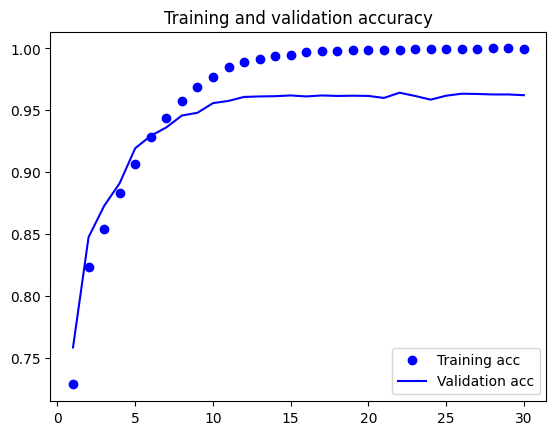

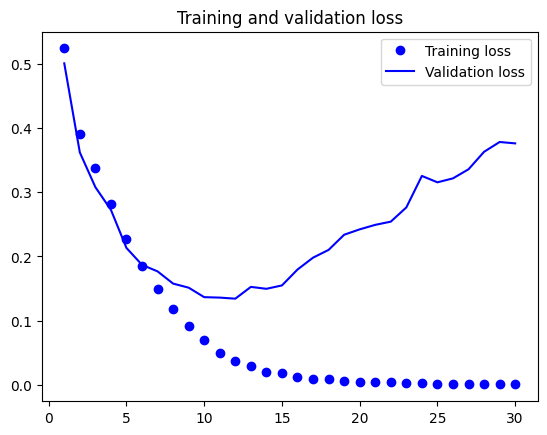

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/5-1/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/5-1/train_test_acc",dpi=100)
plt.show()

In [14]:
# save history data to file
import os
# save data
np.save('history/5-1/acc',acc)
np.save('history/5-1/val_acc',val_acc)
np.save('history/5-1/loss',loss)
np.save('history/5-1/val_loss',val_loss)

In [6]:
model = keras.models.load_model('models/5-1/model.keras')

2024-04-23 22:54:57.983435: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44302336 exceeds 10% of free system memory.
2024-04-23 22:54:59.824788: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44302336 exceeds 10% of free system memory.


In [16]:
model.save('models/5-1/model.h5')

/home/fred/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
file_paths = []
wrong_filenames = []
count = 0
file_idx = 0

# make sure we start in the beginning
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    shuffle=False
    )
    
file_paths = test_dataset.file_paths
for data_batch, labels_batch in test_dataset:

    predictions = model.predict(data_batch).flatten()
    predictions = predictions.round()
    predictions = predictions.astype(int)
    labels_batch = labels_batch.numpy()
    #pred_str = np.array2string(predictions, separator=', ')
    #label_str = np.array2string(labels_batch, separator=', ')
    for i in range(len(data_batch)):
        if labels_batch[i] != predictions[i]:
            wrong_filenames.append(file_paths[file_idx])
    file_idx += 1

# print(f"Predictions: {pred_str}")
# print(f"Labels: {label_str}")
print(file_idx)
print(count)
print(len(wrong_filenames))

Found 5000 files belonging to 2 classes.
1/1 [==============================] - 0s 27ms/step
5000
0
200


In [14]:
# write the wrong filenames to a file
with open('results/5-1/failed_filenames.txt', 'w') as f:
    for item in wrong_filenames:
        f.write("%s\n" % item)

In [17]:
import csv
import os

output_csv = 'results/5-1/failed_squares_cut.csv'
failed_filenames_txt = 'results/5-1/failed_filenames.txt'
source_file = '../../Dataset_Scripts/Datasets/Dataset_5_1/data/squares_cut.csv'

# Extract short filenames from failed_filenames.txt
failed_filenames = set()
with open(failed_filenames_txt, 'r') as f1:
    for line in f1:
        filename = os.path.basename(line.strip())  # Get short filename
        failed_filenames.add(filename)

# Open output CSV file for writing
out = open(output_csv, 'w', newline='')
out_writer = csv.writer(out)

# Iterate over rows in squares.csv
with open(source_file, 'r') as f:
    reader = csv.DictReader(f)
    # Write header to output CSV
    out_writer.writerow(reader.fieldnames)
    # Iterate over rows
    for row in reader:
        # Extract filename from the current row
        filename = os.path.basename(row['Filename'])
        # Check if filename is in the set of failed filenames
        if filename in failed_filenames:
            # Write the row to the output CSV
            out_writer.writerow(row.values())

# Close output CSV file
out.close()

In [18]:
import shutil
output_folder = 'results/5-1/failed_images'
file_name = 'results/5-1/failed_filenames.txt'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

with open(file_name, 'r') as file:
    lines = file.readlines()

for line in lines:
    line = line.strip()
    if os.path.exists(line):
        filename = os.path.basename(line)
        shutil.copy(line, os.path.join(output_folder, filename))
    else:
        print(f"Image path '{line}' does not exist.")